## Biblioteca

In [10]:
# PACOTES NECESSÁRIOS

# install.packages("boot")
# install.packages("ggplot2")
# install.packages("caret")
# install.packages("gmodels")
# install.packages("hmeasure")
# install.packages("pROC")

library(gmodels)
library(boot)
library(hmeasure)
library(pROC)

## Dados

In [12]:
dados.treino <- read.csv("porto_seguro_limpo_treino.csv")
dados.teste <- read.csv("porto_seguro_limpo_teste.csv")

## Regressão Logística

In [13]:
fit1=glm(data = dados.treino, target~ps_ind_01+ps_ind_03+ps_ind_06_bin+ps_ind_07_bin+ps_ind_08_bin+ps_ind_09_bin+ps_ind_12_bin+ps_ind_14+ps_ind_15+ps_ind_16_bin+ps_ind_17_bin+ps_ind_18_bin+ps_reg_01+ps_reg_02+ps_car_08_cat+ps_car_11+ps_car_15+ps_calc_01+ps_calc_02+ps_calc_03+ps_calc_04+ps_calc_05+ps_calc_06+ps_calc_07+ps_calc_08+ps_calc_09+ps_calc_10+ps_calc_11+ps_calc_12+ps_calc_13+ps_calc_14+ps_calc_15_bin+ps_calc_16_bin+ps_calc_17_bin+ps_calc_18_bin+ps_calc_19_bin+ps_calc_20_bin+ps_car_07_cat_null+ps_car_07_cat_1+ps_car_05_cat_null+ps_car_05_cat_1+ps_car_03_cat_null+ps_car_03_cat_1+ps_car_02_cat_1+ps_ind_04_cat_1+ps_ind_02_cat_null+ps_ind_02_cat_2_3_4+ps_ind_05_cat_0+ps_ind_05_cat_1_3_4_5_6+ps_ind_05_cat_2+ps_car_01_cat_6_7+ps_car_01_cat_3_4_5_10+ps_car_01_cat_0_1_2_8_11+ps_car_01_cat_9+ps_car_04_cat_0_4+ps_car_04_cat_1_2+ps_car_04_cat_3_8+ps_car_04_cat_6_9+ps_car_06_cat_0_1_3_4_6_7_11_14+ps_car_06_cat_10_12_15_16+ps_car_06_cat_2_5_8_17+ps_car_09_cat_0_2_3+ps_car_09_cat_1_4+ps_car_11_cat_A+ps_car_11_cat_B+ps_car_11_cat_C+ps_reg_03_no_out+ps_car_12_no_out+ps_car_13_no_out+ps_car_14_no_out, family = binomial())
summary(fit1)


Call:
glm(formula = target ~ ps_ind_01 + ps_ind_03 + ps_ind_06_bin + 
    ps_ind_07_bin + ps_ind_08_bin + ps_ind_09_bin + ps_ind_12_bin + 
    ps_ind_14 + ps_ind_15 + ps_ind_16_bin + ps_ind_17_bin + ps_ind_18_bin + 
    ps_reg_01 + ps_reg_02 + ps_car_08_cat + ps_car_11 + ps_car_15 + 
    ps_calc_01 + ps_calc_02 + ps_calc_03 + ps_calc_04 + ps_calc_05 + 
    ps_calc_06 + ps_calc_07 + ps_calc_08 + ps_calc_09 + ps_calc_10 + 
    ps_calc_11 + ps_calc_12 + ps_calc_13 + ps_calc_14 + ps_calc_15_bin + 
    ps_calc_16_bin + ps_calc_17_bin + ps_calc_18_bin + ps_calc_19_bin + 
    ps_calc_20_bin + ps_car_07_cat_null + ps_car_07_cat_1 + ps_car_05_cat_null + 
    ps_car_05_cat_1 + ps_car_03_cat_null + ps_car_03_cat_1 + 
    ps_car_02_cat_1 + ps_ind_04_cat_1 + ps_ind_02_cat_null + 
    ps_ind_02_cat_2_3_4 + ps_ind_05_cat_0 + ps_ind_05_cat_1_3_4_5_6 + 
    ps_ind_05_cat_2 + ps_car_01_cat_6_7 + ps_car_01_cat_3_4_5_10 + 
    ps_car_01_cat_0_1_2_8_11 + ps_car_01_cat_9 + ps_car_04_cat_0_4 + 
    ps_car_0

## Stepwise p-value < 15%

In [ ]:
fit2=step(fit1)

In [15]:
summary(fit2)


Call:
glm(formula = target ~ ps_ind_01 + ps_ind_03 + ps_ind_06_bin + 
    ps_ind_07_bin + ps_ind_08_bin + ps_ind_15 + ps_ind_16_bin + 
    ps_ind_17_bin + ps_reg_01 + ps_reg_02 + ps_car_11 + ps_calc_01 + 
    ps_calc_02 + ps_calc_17_bin + ps_car_07_cat_null + ps_car_07_cat_1 + 
    ps_car_03_cat_1 + ps_ind_04_cat_1 + ps_ind_02_cat_null + 
    ps_ind_02_cat_2_3_4 + ps_ind_05_cat_0 + ps_ind_05_cat_1_3_4_5_6 + 
    ps_car_01_cat_6_7 + ps_car_01_cat_3_4_5_10 + ps_car_01_cat_0_1_2_8_11 + 
    ps_car_01_cat_9 + ps_car_04_cat_3_8 + ps_car_09_cat_0_2_3 + 
    ps_car_11_cat_A + ps_car_11_cat_C + ps_reg_03_no_out + ps_car_13_no_out + 
    ps_car_14_no_out, family = binomial(), data = dados.treino)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2734  -0.2946  -0.2509  -0.2163   2.9673  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.265263   0.476265  -2.657 0.007892 ** 
ps_ind_01                 0.010797   0.

In [17]:
# PROB
dados.teste$pred=predict(fit2, newdata = dados.teste, type = "response")
head(dados.teste$pred, 5)

[1] 0.02467873 0.02317316 0.01573395 0.02220120 0.04967935

In [18]:
# CROSS VALIDATION
cv.glm(data=dados.teste, glmfit=fit2, K=10)$delta[1]

Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”

[1] 0.03567864

In [23]:
# ROC E AUC
medidah=HMeasure(dados.teste$target, dados.teste$pred) 
medidah$metrics

,H,Gini,AUC,AUCH,KS,MER,MWL,Spec.Sens95,Sens.Spec95,ER,⋯,Precision,Recall,TPR,FPR,F,Youden,TP,FP,TN,FN
scores,0.05026603,0.2530683,0.6265341,0.628246,0.184126,0.03593109,0.0565408,0.1075657,NA,0.0359423,⋯,0.5,0.0001558118,0.0001558118,5.809023e-06,0.0003115265,0.0001500028,1,1,172145,6417



Call:
roc.default(response = dados.teste$target, predictor = dados.teste$pred)

Data: dados.teste$pred in 172146 controls (dados.teste$target 0) < 6418 cases (dados.teste$target 1).
Area under the curve: 0.6265

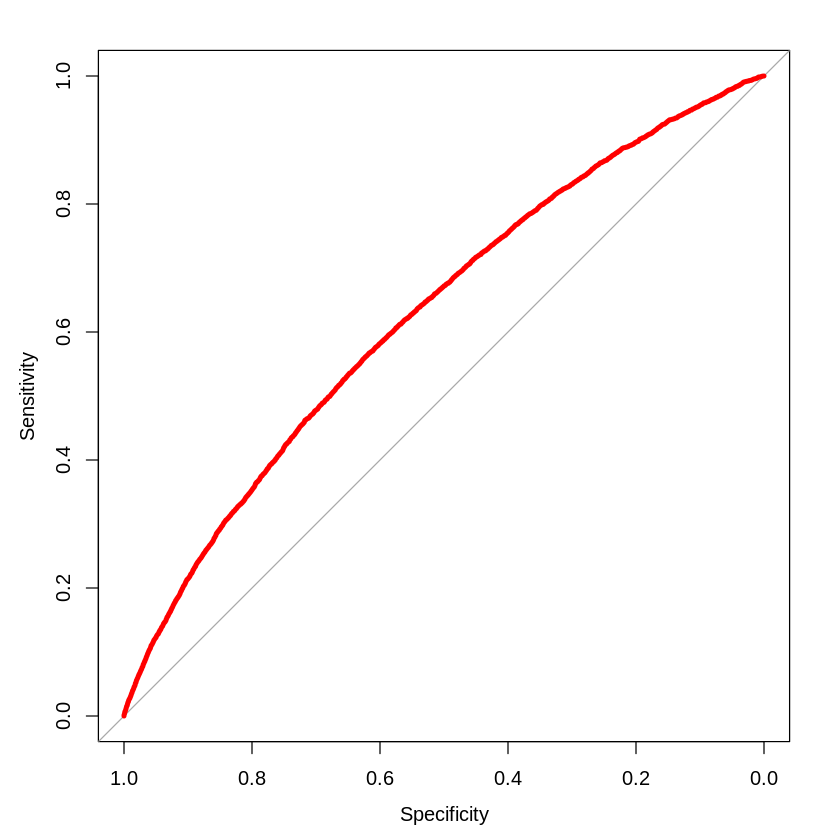

In [20]:
# CURVA ROC
roc1 = roc(dados.teste$target, dados.teste$pred) 
plot(roc1, lwd=4, col="red")
roc1

## Stepwise p-value<50%

In [ ]:
fit3=step(fit1, k=0.45)

In [25]:
summary(fit3)


Call:
glm(formula = target ~ ps_ind_01 + ps_ind_03 + ps_ind_06_bin + 
    ps_ind_07_bin + ps_ind_08_bin + ps_ind_15 + ps_ind_16_bin + 
    ps_ind_17_bin + ps_ind_18_bin + ps_reg_01 + ps_reg_02 + ps_car_11 + 
    ps_car_15 + ps_calc_01 + ps_calc_02 + ps_calc_03 + ps_calc_05 + 
    ps_calc_06 + ps_calc_08 + ps_calc_14 + ps_calc_17_bin + ps_calc_20_bin + 
    ps_car_07_cat_null + ps_car_07_cat_1 + ps_car_05_cat_null + 
    ps_car_05_cat_1 + ps_car_03_cat_null + ps_car_03_cat_1 + 
    ps_ind_04_cat_1 + ps_ind_02_cat_null + ps_ind_02_cat_2_3_4 + 
    ps_ind_05_cat_0 + ps_ind_05_cat_1_3_4_5_6 + ps_car_01_cat_6_7 + 
    ps_car_01_cat_3_4_5_10 + ps_car_01_cat_0_1_2_8_11 + ps_car_01_cat_9 + 
    ps_car_04_cat_0_4 + ps_car_04_cat_1_2 + ps_car_04_cat_3_8 + 
    ps_car_04_cat_6_9 + ps_car_06_cat_0_1_3_4_6_7_11_14 + ps_car_06_cat_2_5_8_17 + 
    ps_car_09_cat_0_2_3 + ps_car_11_cat_A + ps_car_11_cat_B + 
    ps_car_11_cat_C + ps_reg_03_no_out + ps_car_12_no_out + ps_car_13_no_out + 
    ps_car_14_n

In [26]:
dados.teste$predfit3=predict(fit3, newdata = dados.teste, type = "response")
head(dados.teste$predfit3, 5)

[1] 0.02443982 0.02434184 0.01508356 0.02233059 0.05072074

In [29]:
# CROSS VALIDATION
cv.glm(data=dados.teste, glmfit=fit3, K=10)$delta[1]

Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”

[1] 0.03569108

In [28]:
# ROC E AUC
medidah=HMeasure(dados.teste$target, dados.teste$predfit3) 
medidah$metrics

,H,Gini,AUC,AUCH,KS,MER,MWL,Spec.Sens95,Sens.Spec95,ER,⋯,Precision,Recall,TPR,FPR,F,Youden,TP,FP,TN,FN
scores,0.05066024,0.2544372,0.6272186,0.6288169,0.1863633,0.03591989,0.05638575,0.107159,NA,0.0359479,⋯,0,0,0,5.809023e-06,0,-5.809023e-06,0,1,172145,6418



Call:
roc.default(response = dados.teste$target, predictor = dados.teste$predfit3)

Data: dados.teste$predfit3 in 172146 controls (dados.teste$target 0) < 6418 cases (dados.teste$target 1).
Area under the curve: 0.6272

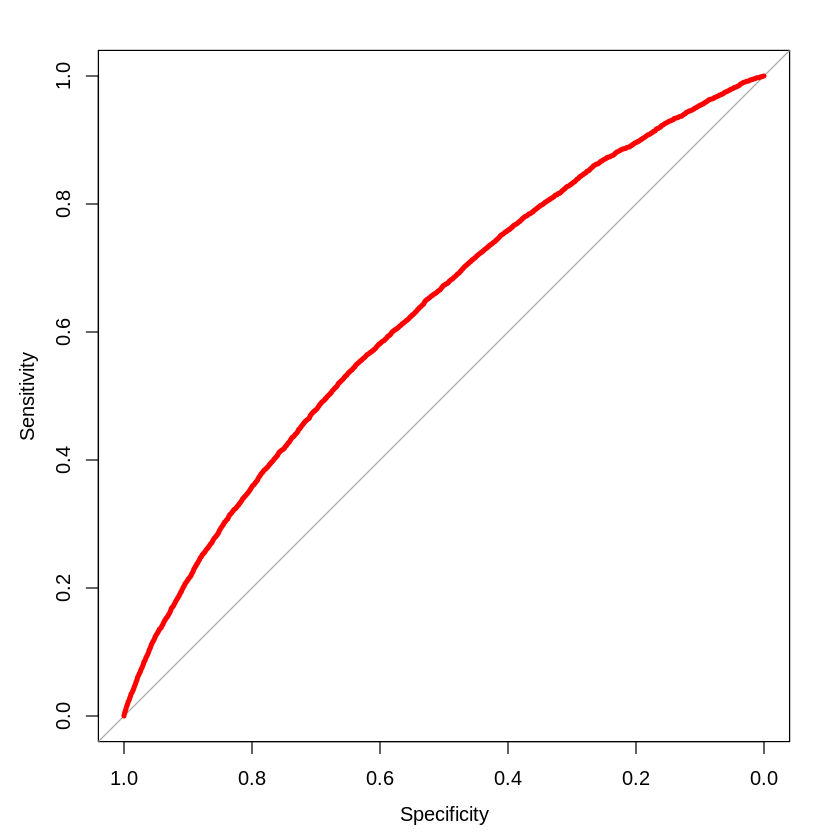

In [27]:
roc2 = roc(dados.teste$target, dados.teste$predfit3) 
plot(roc2, lwd=4, col="red")
roc2